In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as pyt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score,f1_score, confusion_matrix

In [3]:
df=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [7]:
# Store total number of observation in training dataset
df_length =len(df)

# Store total number of columns in testing data set
test_col = len(test.columns)

In [8]:
#for data manipulating we have to fill null values of both numerical and categorical values
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.drop_duplicates()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#Here we can see that there are 4 missing values in categorical variables ('Gender','Married','Dependents','Self_Employed)
#and 3 missing values in non-categorical variables('Loan_Amount','Loan_Amount_Term','Credit_History')
#to remove missing values from categorical variables (replace it with mode) 
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [12]:
#to remove missing values from non-categorical variables(replace it with mean)
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [15]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [16]:
# Loan approval rates in absolute numbers
loan_approval = df['Loan_Status'].value_counts()['Y']
print(loan_approval)

422


<AxesSubplot:xlabel='Gender', ylabel='count'>

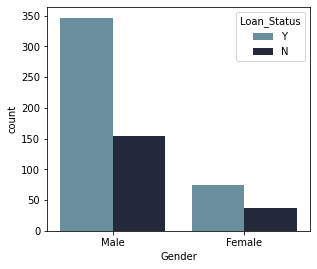

In [17]:
#Exploration of categorical variables
pyt.figure(figsize = (16, 14))
pyt.subplot(331)
sns.countplot(df['Gender'],hue=df['Loan_Status'],palette="ch:r=-.26,l=.52")


<AxesSubplot:xlabel='Dependents', ylabel='count'>

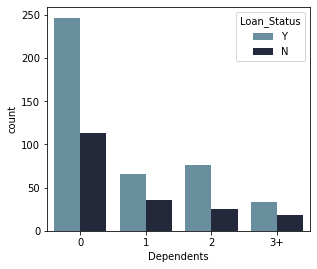

In [18]:
pyt.figure(figsize = (16, 14))
pyt.subplot(332)
sns.countplot(df['Dependents'],hue=df['Loan_Status'],palette="ch:r=-.26,l=.52")


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

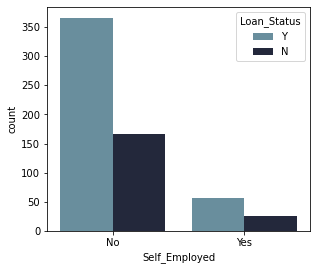

In [19]:
pyt.figure(figsize = (16, 14))
pyt.subplot(333)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'],palette="ch:r=-.26,l=.52")


<AxesSubplot:xlabel='Married', ylabel='count'>

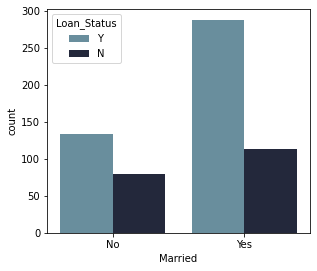

In [20]:
pyt.figure(figsize = (16, 14))
pyt.subplot(334)
sns.countplot(df['Married'],hue=df['Loan_Status'],palette="ch:r=-.26,l=.52")


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

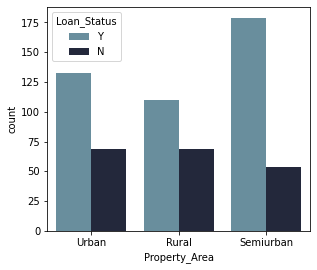

In [21]:
pyt.figure(figsize = (16, 14))
pyt.subplot(335)
sns.set_palette("Set1", 10)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'],palette="ch:r=-.26,l=.52")


<AxesSubplot:xlabel='Education', ylabel='count'>

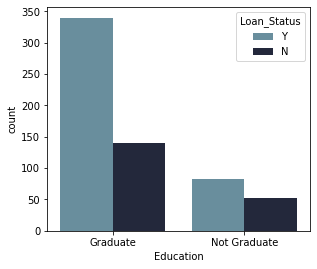

In [22]:
pyt.figure(figsize = (16, 14))
pyt.subplot(336)
sns.countplot(df['Education'],hue=df['Loan_Status'],palette="ch:r=-.26,l=.52")


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

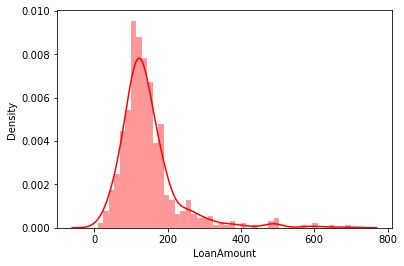

In [23]:
#exploration for non categorical variables
sns.distplot(df['LoanAmount'],color="red")

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

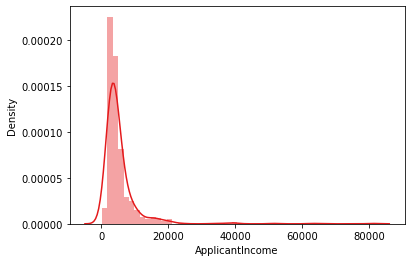

In [24]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

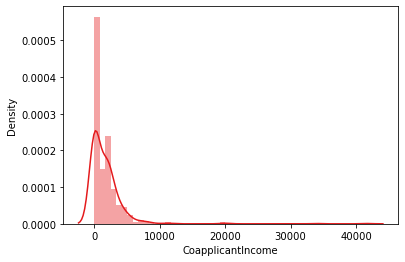

In [25]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

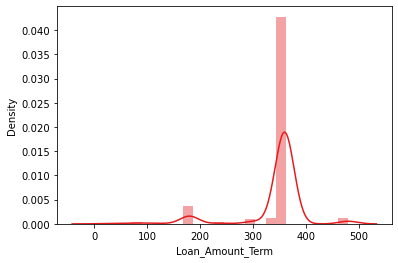

In [26]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='ApplicantIncome_log', ylabel='Density'>

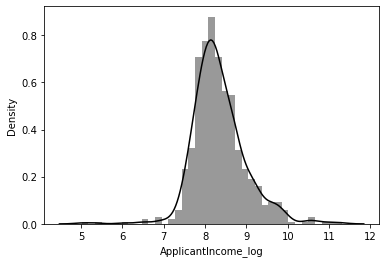

In [27]:
#since all graph of non-categorical variables is left skewed so we are performing log transformations
df['ApplicantIncome_log']=np.log(df['ApplicantIncome'])
#sns.FacetGrid(sns.distplot(df['ApplicantIncome_log']),hue=df['Loan_Status'],size=5).add_legend()
#map(sns.distplot(df['ApplicantIncome_log']),df['Loan_Status'])

sns.distplot(df['ApplicantIncome_log'],color='black')



<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

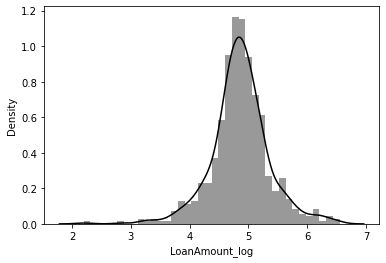

In [28]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount_log'],color='black')


<AxesSubplot:xlabel='Loan_Amount_Term_log', ylabel='Density'>

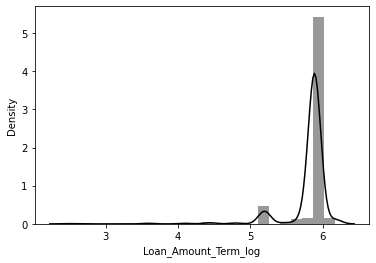

In [29]:
df['Loan_Amount_Term_log']=np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_log'],color='black')


In [30]:
cat_list=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
for variables in cat_list:
    label_encoding=preprocessing.LabelEncoder()
    df[variables]=label_encoding.fit_transform(df[variables].astype('str'))


In [31]:
df.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
ApplicantIncome_log     0
LoanAmount_log          0
Loan_Amount_Term_log    0
dtype: int64

In [32]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,2,2,1,8.674026,4.986426,5.886104
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,2,0,0,8.430109,4.852030,5.886104
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,2,2,1,8.006368,4.189655,5.886104
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,2,2,1,7.856707,4.787492,5.886104
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,2,2,1,8.699515,4.948760,5.886104


In [34]:
# Importing libraries and classes

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [35]:
# X is the input and Y is the output
#x=df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]

X=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Married','Gender','Education','Self_Employed','Property_Area','Dependents']].values
y=df[["Loan_Status"]].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
new_input = [[3, 1500, 126, 360, 1, 0, 1, 0, 1, 2, 1]]
# get prediction for new input
new_output = (model.predict(new_input))
#newpoutput=new_output.replace({1:'Yes',0:'No'})
# summarize input and output
print(new_input,new_output)

[[3, 1500, 126, 360, 1, 0, 1, 0, 1, 2, 1]] [0]


In [39]:
model.score(X_train,y_train)*100

100.0

In [40]:
model.score(X_test,y_test)*100

78.91891891891892

In [41]:
expected = y_test
predicted = model.predict(X_test)

In [42]:
#  Printing the Report

print(metrics.classification_report(expected, predicted))


              precision    recall  f1-score   support

           0       0.70      0.41      0.52        51
           1       0.81      0.93      0.87       134

    accuracy                           0.79       185
   macro avg       0.75      0.67      0.69       185
weighted avg       0.78      0.79      0.77       185



In [43]:
# Out of 51 'Y' outcomes, 25 were right and 26 were wrong similarly, for'N', 124 were right and 10 were wrong.

print(metrics.confusion_matrix(expected, predicted))


[[ 21  30]
 [  9 125]]


In [44]:

import joblib

joblib.dump(model,'loan_prediction_model_new1.ml')

['loan_prediction_model_new1.ml']

In [45]:
import pickle
pickle.dump(model,open('model_final_new1.pkl','wb'))